This notebook contains an unsupervised analysis to define different breast cancers types based on a subset of proteins, PAM50 genes, previously characterized to be important in breast cancer. I have used the k-means clustering  method (3 clusters) directly in the dataset and after applying principal component analysis (PCA). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline
import seaborn as sns

#pandas options
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows',20)

#datasets
filename1='data_analysis.csv'
filename2='protein_description.csv'

# Load data:
data=pd.read_csv(filename1,header=0,index_col=0)
protein_description=pd.read_csv(filename2,header=0, index_col='ID')

data.head(3)

,194,210,290,320,484,779,829,831,1463,1464,...,9244,9849,9989,10489,10628,11343,11418,11424,11659,12279
0,-0.179342,1.670654,-1.463969,2.182497,-3.00619,0.322465,2.319658,2.399947,-5.187379,-1.922286,...,-0.413519,-1.085941,-0.641005,-0.627623,0.469662,0.004654,-4.167037,-0.888563,-7.395331,-3.200222
1,0.106156,-0.487500,1.883845,-2.639094,-1.99296,1.664094,-1.976560,-1.579696,-2.960521,-2.422622,...,-0.169353,2.677574,-0.835166,-2.540698,-0.198871,-0.261189,-1.792888,-0.005359,0.443983,2.569338
2,-0.409316,1.159597,0.739026,0.943825,3.78908,0.230683,1.415596,1.806910,-0.504402,-2.625542,...,0.285540,1.437539,-1.799029,-1.459914,-0.990801,2.403024,-0.153316,-2.076972,-0.826230,0.980397


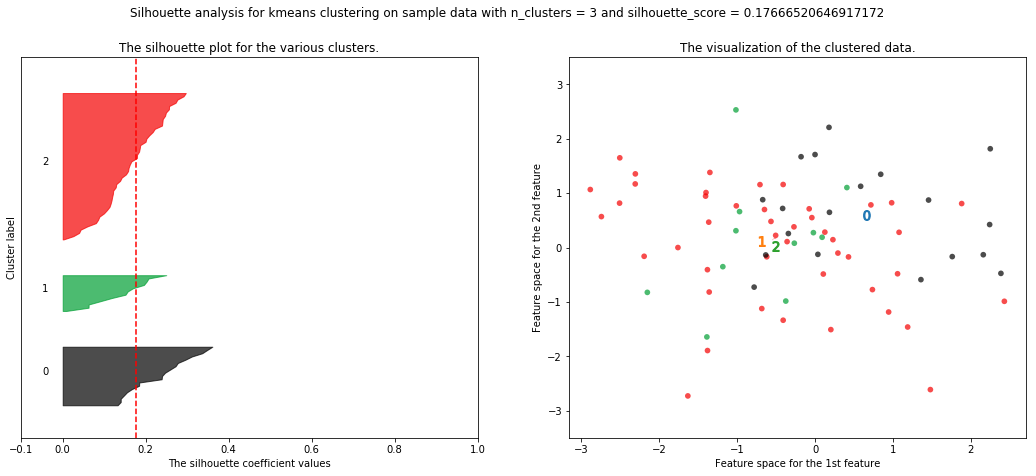

In [2]:
#Silhouette analysis of kmeans (3 clusters) and plot visualization of the clusters
from sklearn.cluster import KMeans
from procedures_cluster import silhouette_analysis
X=data.values
set_lim=[-3.5, 3.5]
subtitle='kmeans'
n_clusters=3    
clusterer1 = KMeans(n_clusters, n_jobs=10).fit(X)
cluster_labels1,centers1=silhouette_analysis(X, n_clusters, clusterer1, set_lim, subtitle)


The analysis of the visualization of kmeans 3 clusters: the left graphic shows that the 2 majoritary groups have a better score as the minoritary. In the right graphic showing the clusters is not possible to see clear groups. This problem might be solve by using PCA reduced data, then the groups might be better represented in the graphic.

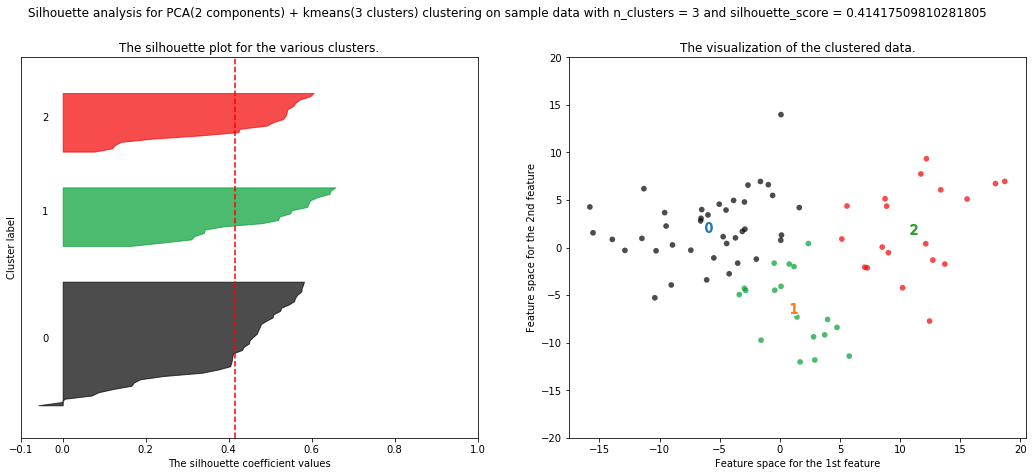

In [3]:
#Silhouette score visualization with pca (2 components) and K-means (3 clusters)
from pca import PCA_model
# Apply PCA by fitting the reduced data with the same number of dimensions as features
pca,df_reduced_data,sum_vexp_var= PCA_model(X,2)

#Apply kmeans with X=df_reduced_data.values, make silhouette analysis, keep cluster_labels (cluster_labels2) and (centers2)
set_lim=[-20, 20]
subtitle='PCA(2 components) + kmeans(3 clusters)'
n_clusters=3
clusterer2 = KMeans(n_clusters, n_jobs=10).fit(df_reduced_data.values)

cluster_labels2, centers2=silhouette_analysis(df_reduced_data.values, n_clusters, clusterer2,set_lim,subtitle)

    

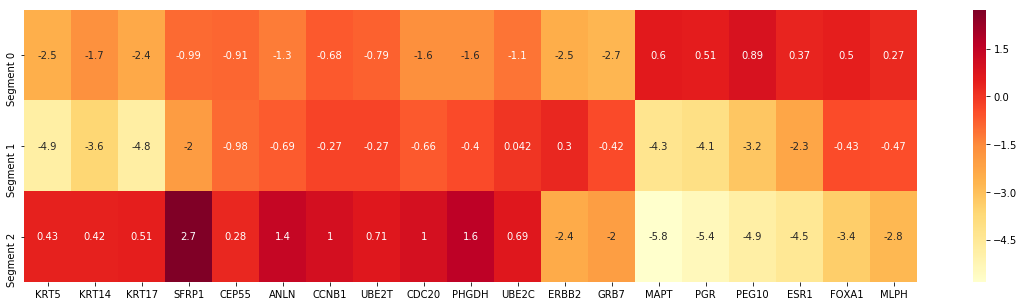

In [4]:
#heatmap segments of selected features showing most striking differences 
segments=['Segment {}'.format(x) for x in range(0,3)] 
select_features=['320','831','829','7446','6230','2029','8290','8794','8869','2900','8288','1463','2416','1996','2493','4395','5264','8048','2470']
select_features_int =[int(x) for x  in select_features]

true_centers=pca.inverse_transform(centers2) 
    
pd_centers=pd.DataFrame(true_centers, columns=data.columns,index=segments)

#heatmap
f, ax = plt.subplots(figsize=(20, 5))
min_value=pd_centers[select_features].min().min()
max_value=pd_centers[select_features].max().max()

sns.heatmap(pd_centers[select_features],vmin=min_value,vmax=max_value,cmap='YlOrRd', annot=True,ax=ax, yticklabels=True, xticklabels=list(protein_description.T[select_features_int].loc['gene_symbol']))
   